### Basic ML Solutions
# Classification Algorithim using Custom NN

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch 

In [2]:
admit_data = pd.read_csv('admission_predict.csv')
admit_data.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
262,263,308,103,2,2.5,4.0,8.36,1,0.70
240,241,296,101,1,2.5,3.0,7.68,0,0.60
383,384,300,100,3,3.0,3.5,8.26,0,0.62
385,386,335,117,5,5.0,5.0,9.82,1,0.96
77,78,301,99,2,3.0,2.0,8.22,0,0.64


In [3]:
# drop Serial #
admit_data = admit_data.drop(columns=['Serial No.'], axis=1)
admit_data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
# need to standardize the data, as mean and std are varying a lot
# std should be close to 1
from sklearn.preprocessing import scale
admit_data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']] = scale(
    admit_data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']])

In [5]:
admit_data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.000000
mean,-3.785861e-16,5.412337e-16,3.087500,1.859624e-16,-3.019807e-16,8.076873e-16,0.547500,0.724350
std,1.001252e+00,1.001252e+00,1.143728,1.001252e+00,1.001252e+00,1.001252e+00,0.498362,0.142609
min,-2.339367e+00,-2.542098e+00,1.000000,-2.386613e+00,-2.733036e+00,-3.020504e+00,0.000000,0.340000
25%,-7.685900e-01,-7.274920e-01,2.000000,-8.949798e-01,-5.042604e-01,-7.201909e-01,0.000000,0.640000
50%,1.679859e-02,-6.763531e-02,3.000000,9.944220e-02,5.293342e-02,1.859559e-02,1.000000,0.730000
75%,7.149218e-01,7.571856e-01,4.000000,5.966532e-01,6.101273e-01,7.783704e-01,1.000000,0.830000
max,2.023903e+00,2.076899e+00,5.000000,1.591075e+00,1.724515e+00,2.218165e+00,1.000000,0.970000


In [6]:
x = admit_data.drop('Chance of Admit ', axis=1)
y = admit_data[['Chance of Admit ']]

In [7]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [8]:
target = y.copy()

In [9]:
target.replace(to_replace = y[y >= 0.80], value=int(2), inplace=True)
target.replace(to_replace = y[y >= 0.60], value=int(1), inplace=True)
target.replace(to_replace = y[y < 0.60], value=int(0), inplace=True)

In [10]:
y = target

In [11]:
y['Chance of Admit '].unique()

array([2., 1., 0.])

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train = torch.tensor(x_train.values, dtype=torch.float)
x_test = torch.tensor(x_test.values, dtype=torch.float)
y_train = torch.from_numpy(y_train.values).view(-1).long()
y_test = torch.from_numpy(y_test.values).view(-1).long()

In [13]:
# instead of using Sequential Models, build Custom Model
import torch.nn as nn
import torch.nn.functional as F

In [14]:
inp = x_train.shape[1]
out = 3

In [15]:
# create a class called Net, and this Net class inherits from the nn.Module class

In [16]:
class Net(nn.Module):
    
    def __init__(self, hidden_size, activation_fn='relu', apply_dropout=False):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(inp, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, out)
        
        self.hidden_size = hidden_size
        self.activation_fn = activation_fn
        
        self.dropout = None
        if apply_dropout:
            self.dropout = nn.Dropout(p=0.2)
            
    def forward(self, x):
        
        activation_fn = None
        if self.activation_fn == 'sigmoid':
            activation_fn = F.torch.sigmoid
        if self.activation_fn == 'tanh':
            activation_fn = F.torch.tanh
        if self.activation_fn == 'relu':
            activation_fn = F.torch.relu
            
        x = activation_fn(self.fc1(x))
        x = activation_fn(self.fc2(x))
        
        if self.dropout != None:
            x = self.dropout(x)
        
        x = self.fc3(x)
        return F.log_softmax(x, dim=-1)       

In [17]:
def train_evaluate_model(model, learning_rate=0.001):
    epoch_data = []
    epochs = 1001
    
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    loss_fn = nn.NLLLoss()
    
    test_accuracy=0.0
    for epoch in range(1, epochs):
        
        optimizer.zero_grad()
        
        # setting the model to training mode
        model.train()
        
        y_pred = model(x_train)
        
        loss = loss_fn(y_pred, y_train)
        loss.backward()
        
        optimizer.step()
        
        # setting the model to evaluation mode
        model.eval()
        
        y_pred_tst = model(x_test)
        loss_tst = loss_fn(y_pred_tst, y_test)
        
        _, pred = y_pred_tst.data.max(1)
        
        test_accuracy = pred.eq(y_test.data).sum().item() / 80 #y_test.values.size
        
        epoch_data.append([epoch, loss.data.item(), loss_tst.data.item(), test_accuracy])
        
        if epoch % 200 == 0:
            print('epoch - %d (%d%%) train loss - %.2f test loss - %.2f Test Accuracy - %.4f'
                 % (epoch, epoch/15, loss.data.item(), loss_tst.data.item(), test_accuracy))
        
        
    return {
        'model': model,
        'epoch_data': epoch_data,
        '# epochs': epochs,
        'optimizer': optimizer,
        'loss_fn': loss_fn, 
        'test accuracy': test_accuracy,
        '_, pred': y_pred_tst.data.max(1),
        'actual ypred label': y_test
    }

In [18]:
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=False)
net

Net(
  (fc1): Linear(in_features=7, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)

In [19]:
res_3_sigmoid = train_evaluate_model(net)

epoch - 200 (13%) train loss - 1.03 test loss - 1.02 Test Accuracy - 0.5000
epoch - 400 (26%) train loss - 0.98 test loss - 0.98 Test Accuracy - 0.5000
epoch - 600 (40%) train loss - 0.86 test loss - 0.87 Test Accuracy - 0.7000
epoch - 800 (53%) train loss - 0.73 test loss - 0.77 Test Accuracy - 0.7375
epoch - 1000 (66%) train loss - 0.66 test loss - 0.72 Test Accuracy - 0.7125


In [20]:
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=True)
net

Net(
  (fc1): Linear(in_features=7, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [21]:
res_3_sigmoid_drop = train_evaluate_model(net)

epoch - 200 (13%) train loss - 1.03 test loss - 1.01 Test Accuracy - 0.5000
epoch - 400 (26%) train loss - 0.99 test loss - 0.99 Test Accuracy - 0.5000
epoch - 600 (40%) train loss - 0.92 test loss - 0.92 Test Accuracy - 0.6250
epoch - 800 (53%) train loss - 0.82 test loss - 0.82 Test Accuracy - 0.7250
epoch - 1000 (66%) train loss - 0.73 test loss - 0.74 Test Accuracy - 0.7250


In [22]:
net = Net(hidden_size=10, activation_fn='tanh', apply_dropout=False)
net

Net(
  (fc1): Linear(in_features=7, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)

In [23]:
res_10_tanh = train_evaluate_model(net)

epoch - 200 (13%) train loss - 0.49 test loss - 0.56 Test Accuracy - 0.7875
epoch - 400 (26%) train loss - 0.42 test loss - 0.55 Test Accuracy - 0.7750
epoch - 600 (40%) train loss - 0.38 test loss - 0.60 Test Accuracy - 0.7375
epoch - 800 (53%) train loss - 0.36 test loss - 0.64 Test Accuracy - 0.7125
epoch - 1000 (66%) train loss - 0.35 test loss - 0.66 Test Accuracy - 0.7250


In [24]:
net = Net(hidden_size=10, activation_fn='sigmoid', apply_dropout=False)
net

Net(
  (fc1): Linear(in_features=7, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)

In [25]:
res_10_sigmoid = train_evaluate_model(net)

epoch - 200 (13%) train loss - 0.91 test loss - 0.91 Test Accuracy - 0.5000
epoch - 400 (26%) train loss - 0.61 test loss - 0.67 Test Accuracy - 0.7000
epoch - 600 (40%) train loss - 0.54 test loss - 0.63 Test Accuracy - 0.6875
epoch - 800 (53%) train loss - 0.49 test loss - 0.61 Test Accuracy - 0.7375
epoch - 1000 (66%) train loss - 0.45 test loss - 0.58 Test Accuracy - 0.7750


In [26]:
net = Net(hidden_size=25, activation_fn='sigmoid', apply_dropout=False)
net

Net(
  (fc1): Linear(in_features=7, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=25, bias=True)
  (fc3): Linear(in_features=25, out_features=3, bias=True)
)

In [27]:
res_25_sigmoid_drop = train_evaluate_model(net) 

epoch - 200 (13%) train loss - 0.55 test loss - 0.61 Test Accuracy - 0.7125
epoch - 400 (26%) train loss - 0.45 test loss - 0.56 Test Accuracy - 0.7875
epoch - 600 (40%) train loss - 0.41 test loss - 0.56 Test Accuracy - 0.7500
epoch - 800 (53%) train loss - 0.38 test loss - 0.58 Test Accuracy - 0.7375
epoch - 1000 (66%) train loss - 0.37 test loss - 0.60 Test Accuracy - 0.7250


In [28]:
result_model = res_10_sigmoid

In [29]:
df_epochs_data = pd.DataFrame(result_model['epoch_data'], columns=['epoch', 'train_loss', 'test_loss', 'accuracy'])

In [30]:
df_epochs_data.head(5)

,epoch,train_loss,test_loss,accuracy
0,1,1.116634,1.115349,0.175
1,2,1.113602,1.112247,0.175
2,3,1.110625,1.109199,0.275
3,4,1.107702,1.106209,0.400
4,5,1.104835,1.103274,0.475


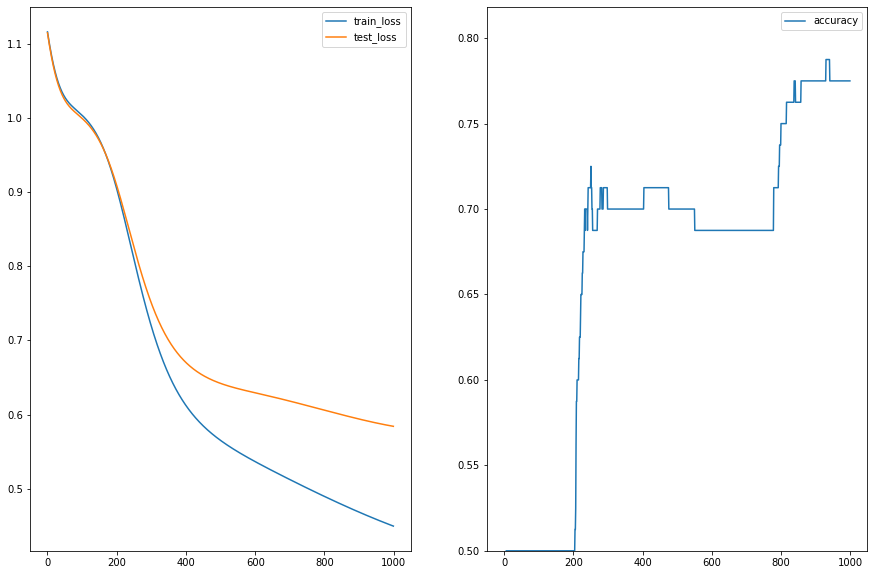

In [31]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
df_epochs_data[['train_loss', 'test_loss']].plot(ax=ax1)
df_epochs_data[['accuracy']].plot(ax=ax2)
plt.ylim(bottom=0.5)
plt.show()